# 1. `make_regression()`
* scikit-learn의 datasets 서브패키지의 회귀분석용 가상 데이터 생성 명령어 `make_regression()`으로 만들어진 데이터는 종속 변수 y의 값이 독립 변수 x 벡터의 선형 조합인 선형관계를 가진다.
* 여기에 잡음(noise) 또는 교란(disturbance) ε이 추가됨
    * 중심극한정리에 따라 이러한 종속 변수 y에 영향을 미치는 모든 영향의 합은 정규 분포를 따를 가능성이 높기 때문에 잡음 ε는 보통 기댓값이 0인 정규 분포 확률 변수로 가정한다.
* x = 0일 때, y가 가질 수 있는 값 b를 편향값(bias)으로 더해준다.
$$ y = b + w^Tx + ε $$
    * $x, w$ : $M$차원($M$은 입력 차원) 
    * $y, b, ε$ : 스칼라값  
* ex)  
N개의 y 데이터가 있는 경우 다음같이 쓸 수 있다.
$$ y = b1 + Xw + ε $$
    * $y$ : $N$차원 벡터($N$은 데이터 갯수)
    * $X$ : $N * M$차원 행렬($M$은 입력 차원)
    * $w$ : $M$차원 벡터
    * $ε$ : $N$차원 벡터
    * $1$ : $N$차원 1-벡터
* `make_regression()` 명령은 내부적으로 입력(독립변수) 데이터인 $X$ 행렬, 잡음 $ε$ 벡터, 계수 $ω$ 벡터를 확률적으로 생성하고, 위 관계식에 따라 출력(종속변수) 데이터 $y$ 벡터를 계산하여 X, y값을 출력한다.

# 2. `make_regression()` 사용법
`X, y = make_regression(...)` 또는 `X, y, w = make_regression(..., coef=True, ...)`
* 입력 인수
    * `n_samples` : 정수 (옵션, 디폴트 100)
        * 표본 데이터의 갯수 $N$
    * `n_features` : 정수 (옵션, 디폴트 100)
        * 독립변수(feature)의 수(차원) $M$
    * `n_targets` : 정수 (옵션, 디폴트 1)
        * 종속변수(target)의 수(차원)
    * `bias` : 실수 (옵션, 디폴트 0.0)
        * y절편
    * `noise` : 실수 (옵션, 디폴트 0.0)
        * 출력. 즉, 종속변수에 더해지는 잡음 $ε$의 표준 편차
    * `coef` : 불리언 (옵션, 디폴트 False)
        * `True`이면 선형 모형의 계수도 출력
    * `random_state` : 정수 (옵션, 디폴트 None)
        * 난수 발생용 시드값
* 출력
    * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
        * 독립변수의 표본 데이터 행렬 $X$
    * `y` : [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열
        * 종속변수의 표본 데이터 벡터 $y$
    * `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열 (옵션)
        * 선형 모형의 계수 벡터 $w$, `coef` 인수가 `True`인 경우에만 출력

In [1]:
# 독립 변수 1개, 종속 변수 1개, 잡음 없는 데이터셋
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0, coef=True,
                         random_state=0)
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [2]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [3]:
w

array(79.17250381)

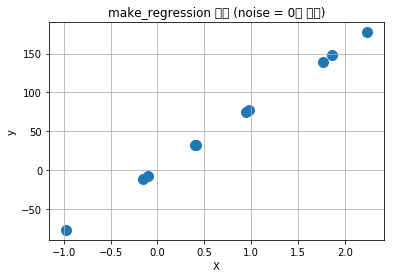

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=100)
plt.xlabel("X")
plt.ylabel("y")
plt.title("make_regression 예제 (noise = 0인 경우)")
plt.grid()
plt.show()

출력된 선형 모형
$$ y = 79.1725x $$

* `noise` 인수 증가시키면 $Var[ε]$ 증가  
`bias` 인수 증가시키면 $y$절편 $b$ 증가

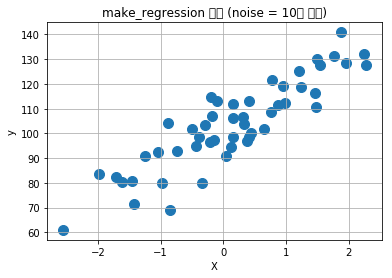

In [10]:
# bias와 noise를 가진 데이터셋
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True,
                         random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("X")
plt.ylabel("y")
plt.title("make_regression 예제 (noise = 10인 경우)")
plt.grid()
plt.show()

# 연습 문제
(1) `make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True, n_features=1`라고 가정한다. 즉 항상 가중치 계수를 반환하고 1차원 독립 변수만 생성할 수 있다. 따라서 `make_regression2`는 다음과 같은 인수만 가진다.
* `n_samples`, `bias`, `noise`, `random_state`

따라서 함수 사용법은 다음과 같아야 한다.  
`X, y, w = make_regression(n_samples, bias, noise, random_state)`

In [ ]:
def make_regression2(n_samples, bias, noies, random_state, coef=True, n_features=1):
    

(2) `make_regression2` 함수에 `coef` 인수를 추가하여 `make_regression3` 함수를 만들어라. `make_regression3` 함수는 가중치를 스스로 생성하지 않고 `coef` 인수로 받은 가중치 계수 배열 값을 그대로 사용하며 가중치 계수를 반환하지 않는다. 독립 변수의 차원은 `coef` 인수로 받은 가중치 계수 배열의 길이로 결정된다. 따라서 함수 사용법은 다음과 같아야 한다.  
`X, y = make_regression(n_samples, coef, bias, noise, random_state)`

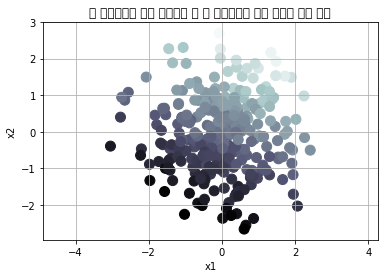

In [16]:
# 독립 변수 2개인 데이터셋
import matplotlib as mpl

X, y, w = make_regression(n_samples=300, n_features=2, noise=10, coef=True,
                         random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.grid()
plt.show()

# 3. `make_regression()` 추가 인수
* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립변수(feature) 중 시렞로 종속변수와 상관관계가 있는 독립변수의 수(차원)
* `effective_rank` : 정수 또는 None (옵션, 디폴트 None)
    * 독립변수(feature) 중 서로 독립인 독립변수의 수, 만약 None이면 모두 독립
* `tail_strength` : 0 ~ 1 사이 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 `None`이 아닌 경우 독립변수 간의 상관관계를 결정하는 변수
    * 0.5면 독립변수 간의 상관관계가 없다.

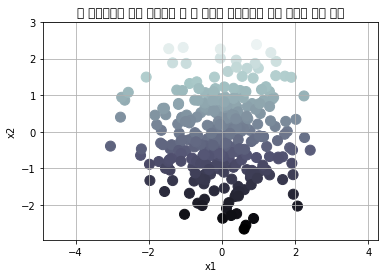

In [18]:
# 2차원 독립 변수 중 실제로 종속 변수에 영향을 미치는 독립 변수가 1개인 데이터셋
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, noise=0,
                         coef=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.grid()
plt.show()

두 독립변수가 서로 독립이 아니고 상관관계를 가지는 경우 `tail_strength` 인수를 0에 가까운 작은 값으로 설정한다.  
이 기능은 다중 공선성(multicolinearity)을 가지는 데이터를 시뮬레이션 할 때 유용

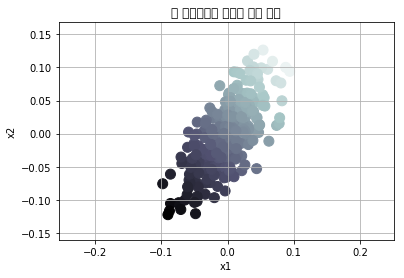

In [21]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0,
                         tail_strength=0, coef=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.grid()
plt.show()